In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('bank_churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
drop_col = ['Surname', 'RowNumber', 'CustomerId']
df.drop(columns=drop_col, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
def print_unique_col_values(df):
    for col in df:
        print(f'{col} : {df[col].unique()}')

In [6]:
print_unique_col_values(df)

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

2037 7963


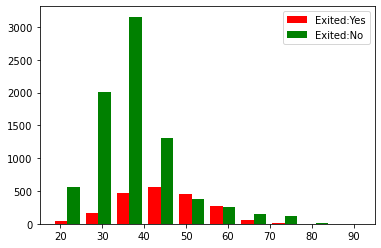

In [7]:
from matplotlib import pyplot as plt
age_exited = df[df.Exited==1].Age
age_not_exited = df[df.Exited==0].Age
print(len(age_exited), len(age_not_exited))
plt.hist([age_exited, age_not_exited], color=['red', 'green'], label=['Exited:Yes', 'Exited:No'])
plt.legend()


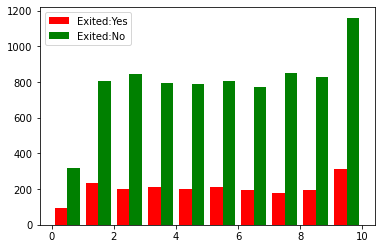

In [8]:
tenure_exited = df[df.Exited==1].Tenure
tenure_not_exited = df[df.Exited==0].Tenure
plt.hist([tenure_exited, tenure_not_exited], color=['red', 'green'], label=['Exited:Yes', 'Exited:No'])
plt.legend()

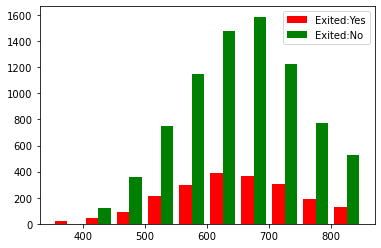

In [9]:
credit_exited = df[df.Exited==1].CreditScore
credit_not_exited = df[df.Exited==0].CreditScore
plt.hist([credit_exited, credit_not_exited], color=['red', 'green'], label=['Exited:Yes', 'Exited:No'])
plt.legend()

In [10]:
len(df[df.Exited==1])

2037

In [11]:
df1 = pd.get_dummies(data=df, columns=['Geography'])

In [12]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [13]:
# df1.replace('Male', 0, inplace=True)
# df1.replace('Female', 1, inplace=True)
df1['Gender'].replace({'Female':1, 'Male':0}, inplace=True)

In [14]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [15]:
normal_col = ['CreditScore', 'Balance', 'EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
df1[normal_col] = s.fit_transform(df1[normal_col])

In [16]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,42,2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,1,41,1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,1,42,8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,1,39,1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,1,43,2,0.500246,1,1,1,0.395400,0,0,0,1


In [17]:
x = df1.drop('Exited', axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [18]:
x_train.shape

(8000, 12)

In [19]:
x_test.shape

(2000, 12)

In [20]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)

In [21]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 630us/step - loss: 0.6690 - accuracy: 0.6896
Epoch 2/100
250/250 [==============================] - 0s 482us/step - loss: 0.5210 - accuracy: 0.7995
Epoch 3/100
250/250 [==============================] - 0s 508us/step - loss: 0.5115 - accuracy: 0.7922
Epoch 4/100
250/250 [==============================] - 0s 523us/step - loss: 0.4961 - accuracy: 0.7918
Epoch 5/100
250/250 [==============================] - 0s 474us/step - loss: 0.4663 - accuracy: 0.8035
Epoch 6/100
250/250 [==============================] - 0s 499us/step - loss: 0.4488 - accuracy: 0.8076
Epoch 7/100
250/250 [==============================] - 0s 511us/step - loss: 0.4566 - accuracy: 0.8072
Epoch 8/100
250/250 [==============================] - 0s 476us/step - loss: 0.4339 - accuracy: 0.8185
Epoch 9/100
250/250 [==============================] - 0s 559us/step - loss: 0.4466 - accuracy: 0.8059
Epoch 10/100
250/250 [==============================] - 0s 481us/step - l

250/250 [==============================] - 0s 469us/step - loss: 0.4248 - accuracy: 0.8165
Epoch 80/100
250/250 [==============================] - 0s 469us/step - loss: 0.4401 - accuracy: 0.8058
Epoch 81/100
250/250 [==============================] - 0s 515us/step - loss: 0.4349 - accuracy: 0.8045
Epoch 82/100
250/250 [==============================] - 0s 471us/step - loss: 0.4266 - accuracy: 0.8116
Epoch 83/100
250/250 [==============================] - 0s 551us/step - loss: 0.4372 - accuracy: 0.8053
Epoch 84/100
250/250 [==============================] - 0s 496us/step - loss: 0.4284 - accuracy: 0.8147
Epoch 85/100
250/250 [==============================] - 0s 475us/step - loss: 0.4246 - accuracy: 0.8130
Epoch 86/100
250/250 [==============================] - 0s 464us/step - loss: 0.4273 - accuracy: 0.8149
Epoch 87/100
250/250 [==============================] - 0s 466us/step - loss: 0.4287 - accuracy: 0.8164
Epoch 88/100
250/250 [==============================] - 0s 483us/step - loss:

In [22]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 540us/step - loss: 0.4285 - accuracy: 0.8105


[0.4285394251346588, 0.8105000257492065]

In [23]:
yp = model.predict(x_test)
yp[:5]

array([[0.1396215 ],
       [0.08591831],
       [0.09323785],
       [0.06966674],
       [0.16489187]], dtype=float32)

In [24]:
y_pred = []
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    

In [25]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [26]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.59      0.21      0.31       405

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



<AxesSubplot:>

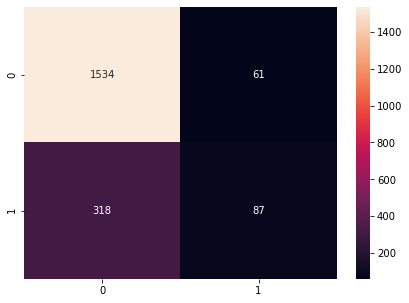

In [28]:
import seaborn as sn
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d')

In [29]:
(1547+161)/(1547+161+244+48)

0.854

In [30]:
print(round(1547/(1547+244), 2), round(161/(161+48), 2))

0.86 0.77


In [31]:
print(round(1547/(1547+48), 2), round(161/(244+161), 2))

0.97 0.4


In [32]:
# Using dropout regularization
modeld = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)

In [33]:
modeld.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 500us/step - loss: 1.7670 - accuracy: 0.5561
Epoch 2/100
250/250 [==============================] - 0s 550us/step - loss: 0.5993 - accuracy: 0.7822
Epoch 3/100
250/250 [==============================] - 0s 497us/step - loss: 0.5632 - accuracy: 0.7947
Epoch 4/100
250/250 [==============================] - 0s 477us/step - loss: 0.5560 - accuracy: 0.7817
Epoch 5/100
250/250 [==============================] - 0s 509us/step - loss: 0.5417 - accuracy: 0.7876
Epoch 6/100
250/250 [==============================] - 0s 530us/step - loss: 0.5364 - accuracy: 0.7834
Epoch 7/100
250/250 [==============================] - 0s 490us/step - loss: 0.5272 - accuracy: 0.7909
Epoch 8/100
250/250 [==============================] - 0s 480us/step - loss: 0.5177 - accuracy: 0.7965
Epoch 9/100
250/250 [==============================] - 0s 478us/step - loss: 0.5169 - accuracy: 0.7912
Epoch 10/100
250/250 [==============================] - 0s 473us/step - l

250/250 [==============================] - 0s 477us/step - loss: 0.4499 - accuracy: 0.8120
Epoch 80/100
250/250 [==============================] - 0s 474us/step - loss: 0.4530 - accuracy: 0.8119
Epoch 81/100
250/250 [==============================] - 0s 508us/step - loss: 0.4559 - accuracy: 0.8030
Epoch 82/100
250/250 [==============================] - 0s 498us/step - loss: 0.4440 - accuracy: 0.8140
Epoch 83/100
250/250 [==============================] - 0s 478us/step - loss: 0.4316 - accuracy: 0.8214
Epoch 84/100
250/250 [==============================] - 0s 511us/step - loss: 0.4408 - accuracy: 0.8136
Epoch 85/100
250/250 [==============================] - 0s 515us/step - loss: 0.4454 - accuracy: 0.8134
Epoch 86/100
250/250 [==============================] - 0s 479us/step - loss: 0.4485 - accuracy: 0.8106
Epoch 87/100
250/250 [==============================] - 0s 475us/step - loss: 0.4486 - accuracy: 0.8097
Epoch 88/100
250/250 [==============================] - 0s 477us/step - loss:

In [34]:
modeld.evaluate(x_test, y_test)

63/63 [==============================] - 0s 457us/step - loss: 0.4378 - accuracy: 0.8090


[0.43778276443481445, 0.8090000152587891]

In [46]:
def ANN(x_train, y_train, x_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(12, input_shape=(12,), activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss= loss,
        metrics='accuracy'
    )
    model.fit(x_train, y_train, epochs=10)
    print(model.evaluate(x_test, y_test))
    y_pred = model.predict(x_test)
    y_pred_classes = np.round(y_pred)
    print(classification_report(y_test, y_pred_classes))
    return y_pred_classes

In [47]:
y_pred = ANN(x_train, y_train, x_test, y_test, "binary_crossentropy")

Epoch 1/10
250/250 [==============================] - 0s 514us/step - loss: 5.6723 - accuracy: 0.4388
Epoch 2/10
250/250 [==============================] - 0s 487us/step - loss: 0.5864 - accuracy: 0.7534
Epoch 3/10
250/250 [==============================] - 0s 490us/step - loss: 0.5063 - accuracy: 0.7911
Epoch 4/10
250/250 [==============================] - 0s 518us/step - loss: 0.4770 - accuracy: 0.7982
Epoch 5/10
250/250 [==============================] - 0s 497us/step - loss: 0.4551 - accuracy: 0.8045
Epoch 6/10
250/250 [==============================] - 0s 502us/step - loss: 0.4520 - accuracy: 0.8097
Epoch 7/10
250/250 [==============================] - 0s 504us/step - loss: 0.4454 - accuracy: 0.8104
Epoch 8/10
250/250 [==============================] - 0s 500us/step - loss: 0.4379 - accuracy: 0.8187
Epoch 9/10
250/250 [==============================] - 0s 501us/step - loss: 0.4504 - accuracy: 0.8085
Epoch 10/10
63/63 [==============================] - 0s 538us/step - loss: 0.4447 

## Undersampling

In [60]:
exited_0_count, exited_1_count = df1['Exited'].value_counts()
exited_0_count

7963

In [62]:
sample_exited_1 = df1[df1.Exited==1]
sample_exited_0 = df1[df1.Exited==0]

In [63]:
len(sample_exited_0)

7963

In [64]:
len(sample_exited_1)

2037

In [71]:
sample_exited_0_under = sample_exited_0.sample(exited_1_count)
df_under = pd.concat([sample_exited_0_under, sample_exited_1], axis=0)

In [72]:
df_under.Exited.value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

In [80]:
x = df_under.drop('Exited', axis=1)
y = df_under['Exited']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20, stratify=y)

In [88]:
y_train.value_counts()

0    1630
1    1629
Name: Exited, dtype: int64

In [90]:
y_pred = ANN(x_train, y_train, x_test, y_test, "binary_crossentropy")

Epoch 1/10
102/102 [==============================] - 0s 597us/step - loss: 1.4980 - accuracy: 0.5091
Epoch 2/10
102/102 [==============================] - 0s 570us/step - loss: 0.6499 - accuracy: 0.6407
Epoch 3/10
102/102 [==============================] - 0s 558us/step - loss: 0.6440 - accuracy: 0.6573
Epoch 4/10
102/102 [==============================] - 0s 593us/step - loss: 0.6304 - accuracy: 0.6539
Epoch 5/10
102/102 [==============================] - 0s 561us/step - loss: 0.6116 - accuracy: 0.6834
Epoch 6/10
102/102 [==============================] - 0s 557us/step - loss: 0.6089 - accuracy: 0.6907
Epoch 7/10
102/102 [==============================] - 0s 559us/step - loss: 0.6016 - accuracy: 0.6865
Epoch 8/10
102/102 [==============================] - 0s 529us/step - loss: 0.6052 - accuracy: 0.6902
Epoch 9/10
102/102 [==============================] - 0s 538us/step - loss: 0.5972 - accuracy: 0.6982
Epoch 10/10
26/26 [==============================] - 0s 573us/step - loss: 0.5773 

# Oversampling

In [98]:
sample_exited_1_over = sample_exited_1.sample(exited_0_count, replace=True)
df_over = pd.concat([sample_exited_0, sample_exited_1_over], axis=0)

In [100]:
x = df_over.drop('Exited', axis=1)
y = df_over['Exited']

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [103]:
y_train.value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

In [105]:
y_pred = ANN(x_train, y_train, x_test, y_test, "binary_crossentropy")

Epoch 1/10
399/399 [==============================] - 1s 540us/step - loss: 0.6812 - accuracy: 0.5489
Epoch 2/10
399/399 [==============================] - 0s 567us/step - loss: 0.6124 - accuracy: 0.6751
Epoch 3/10
399/399 [==============================] - 0s 526us/step - loss: 0.5869 - accuracy: 0.6943
Epoch 4/10
399/399 [==============================] - 0s 552us/step - loss: 0.5809 - accuracy: 0.7021
Epoch 5/10
399/399 [==============================] - 0s 507us/step - loss: 0.5751 - accuracy: 0.7072
Epoch 6/10
399/399 [==============================] - 0s 513us/step - loss: 0.5757 - accuracy: 0.7142
Epoch 7/10
399/399 [==============================] - 0s 563us/step - loss: 0.5780 - accuracy: 0.7130
Epoch 8/10
399/399 [==============================] - 0s 516us/step - loss: 0.5737 - accuracy: 0.7071
Epoch 9/10
399/399 [==============================] - 0s 521us/step - loss: 0.5630 - accuracy: 0.7210
Epoch 10/10
100/100 [==============================] - 0s 454us/step - loss: 0.540

# SMOTE

In [123]:
x = df1.drop('Exited', axis=1)
y = df1['Exited']
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [126]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")
x_sm, y_sm = smote.fit_resample(x, y)
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [131]:
y_pred = ANN(x_train, y_train, x_test, y_test, "binary_crossentropy")

Epoch 1/10
399/399 [==============================] - 1s 548us/step - loss: 0.8615 - accuracy: 0.5276
Epoch 2/10
399/399 [==============================] - 0s 548us/step - loss: 0.6177 - accuracy: 0.6908
Epoch 3/10
399/399 [==============================] - 0s 574us/step - loss: 0.5900 - accuracy: 0.7134
Epoch 4/10
399/399 [==============================] - 0s 556us/step - loss: 0.5662 - accuracy: 0.7281
Epoch 5/10
399/399 [==============================] - 0s 549us/step - loss: 0.5634 - accuracy: 0.7167
Epoch 6/10
399/399 [==============================] - 0s 547us/step - loss: 0.5533 - accuracy: 0.7275
Epoch 7/10
399/399 [==============================] - 0s 525us/step - loss: 0.5515 - accuracy: 0.7268
Epoch 8/10
399/399 [==============================] - 0s 510us/step - loss: 0.5473 - accuracy: 0.7263
Epoch 9/10
399/399 [==============================] - 0s 514us/step - loss: 0.5383 - accuracy: 0.7328
Epoch 10/10
100/100 [==============================] - 0s 434us/step - loss: 0.527

## Emsemble with undersampling

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [145]:
df2 = x_train.copy()
df2['Exited'] = y_train
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
5710,0.856,0,34,5,0.554265,2,0,0,0.339721,1,0,0,0
3745,0.852,1,37,1,0.371163,2,1,1,0.980432,0,1,0,0
5429,0.664,1,48,7,0.000000,2,1,0,0.325318,1,0,0,0
551,0.648,0,47,6,0.426077,1,1,1,0.010339,0,1,0,1
8967,0.970,0,25,7,0.000000,2,1,1,0.417230,1,0,0,0


In [144]:
df2.Exited.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [149]:
df2_exited_0 = df2[df2.Exited==0]
df2_exited_1 = df2[df2.Exited==1]

In [151]:
def get_train_batch(df_majority, df_minority, start, end):
    df = pd.concat([df_majority[start:end], df_minority], axis=0)
    x_train = df.drop('Exited', axis=1)
    y_train = df.Exited
    return x_train, y_train

In [164]:
x_train, y_train = get_train_batch(df2_exited_0, df2_exited_1, 0, 1630)
y_pred1 = ANN(x_train, y_train, x_test, y_test, "binary_crossentropy")

Epoch 1/10
102/102 [==============================] - 0s 603us/step - loss: 4.6046 - accuracy: 0.5066
Epoch 2/10
102/102 [==============================] - 0s 579us/step - loss: 1.0131 - accuracy: 0.4852
Epoch 3/10
102/102 [==============================] - 0s 566us/step - loss: 0.7973 - accuracy: 0.4827
Epoch 4/10
102/102 [==============================] - 0s 568us/step - loss: 0.7303 - accuracy: 0.4910
Epoch 5/10
102/102 [==============================] - 0s 554us/step - loss: 0.6974 - accuracy: 0.5014
Epoch 6/10
102/102 [==============================] - 0s 530us/step - loss: 0.6772 - accuracy: 0.4988
Epoch 7/10
102/102 [==============================] - 0s 526us/step - loss: 0.6644 - accuracy: 0.6330
Epoch 8/10
102/102 [==============================] - 0s 542us/step - loss: 0.6476 - accuracy: 0.6698
Epoch 9/10
102/102 [==============================] - 0s 521us/step - loss: 0.6396 - accuracy: 0.6744
Epoch 10/10
63/63 [==============================] - 0s 488us/step - loss: 0.5898 

In [165]:
x_train, y_train = get_train_batch(df2_exited_0, df2_exited_1, 1630, 3260)
y_pred2 = ANN(x_train, y_train, x_test, y_test, "binary_crossentropy")

Epoch 1/10
102/102 [==============================] - 0s 610us/step - loss: 0.9669 - accuracy: 0.5184
Epoch 2/10
102/102 [==============================] - 0s 633us/step - loss: 0.6695 - accuracy: 0.5786
Epoch 3/10
102/102 [==============================] - 0s 549us/step - loss: 0.6546 - accuracy: 0.5951
Epoch 4/10
102/102 [==============================] - 0s 547us/step - loss: 0.6499 - accuracy: 0.6209
Epoch 5/10
102/102 [==============================] - 0s 535us/step - loss: 0.6354 - accuracy: 0.6418
Epoch 6/10
102/102 [==============================] - 0s 548us/step - loss: 0.6311 - accuracy: 0.6528
Epoch 7/10
102/102 [==============================] - 0s 541us/step - loss: 0.6202 - accuracy: 0.6624
Epoch 8/10
102/102 [==============================] - 0s 557us/step - loss: 0.5981 - accuracy: 0.6911
Epoch 9/10
102/102 [==============================] - 0s 538us/step - loss: 0.6021 - accuracy: 0.6730
Epoch 10/10
63/63 [==============================] - 0s 480us/step - loss: 0.5713 

In [166]:
x_train, y_train = get_train_batch(df2_exited_0, df2_exited_1, 3260, 4890)
y_pred3 = ANN(x_train, y_train, x_test, y_test, "binary_crossentropy")

Epoch 1/10
102/102 [==============================] - 0s 607us/step - loss: 1.4631 - accuracy: 0.5073
Epoch 2/10
102/102 [==============================] - 0s 573us/step - loss: 0.6813 - accuracy: 0.5696
Epoch 3/10
102/102 [==============================] - 0s 573us/step - loss: 0.6690 - accuracy: 0.5778
Epoch 4/10
102/102 [==============================] - 0s 549us/step - loss: 0.6525 - accuracy: 0.6322
Epoch 5/10
102/102 [==============================] - 0s 533us/step - loss: 0.6353 - accuracy: 0.6640
Epoch 6/10
102/102 [==============================] - 0s 603us/step - loss: 0.6150 - accuracy: 0.6811
Epoch 7/10
102/102 [==============================] - 0s 551us/step - loss: 0.6064 - accuracy: 0.6746
Epoch 8/10
102/102 [==============================] - 0s 549us/step - loss: 0.5990 - accuracy: 0.6882
Epoch 9/10
102/102 [==============================] - 0s 532us/step - loss: 0.5915 - accuracy: 0.6921
Epoch 10/10
63/63 [==============================] - 0s 506us/step - loss: 0.5483 

In [167]:
x_train, y_train = get_train_batch(df2_exited_0, df2_exited_1, 4890, 6370)
y_pred4 = ANN(x_train, y_train, x_test, y_test, "binary_crossentropy")

Epoch 1/10
98/98 [==============================] - 0s 592us/step - loss: 0.7048 - accuracy: 0.5393
Epoch 2/10
98/98 [==============================] - 0s 577us/step - loss: 0.6683 - accuracy: 0.5862
Epoch 3/10
98/98 [==============================] - 0s 546us/step - loss: 0.6557 - accuracy: 0.6138
Epoch 4/10
98/98 [==============================] - 0s 570us/step - loss: 0.6418 - accuracy: 0.6327
Epoch 5/10
98/98 [==============================] - 0s 595us/step - loss: 0.6285 - accuracy: 0.6541
Epoch 6/10
98/98 [==============================] - 0s 606us/step - loss: 0.6153 - accuracy: 0.6669
Epoch 7/10
98/98 [==============================] - 0s 556us/step - loss: 0.6032 - accuracy: 0.6932
Epoch 8/10
98/98 [==============================] - 0s 542us/step - loss: 0.5876 - accuracy: 0.6843
Epoch 9/10
98/98 [==============================] - 0s 529us/step - loss: 0.6001 - accuracy: 0.6752
Epoch 10/10
63/63 [==============================] - 0s 473us/step - loss: 0.6503 - accuracy: 0.6275

In [174]:
y_pred_final = []
for i in range(len(y_pred1)):
    sum = y_pred1[i] + y_pred2[i] + y_pred3[i] + y_pred4[i]
    if sum>2:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)

In [175]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1593
           1       0.37      0.62      0.46       407

    accuracy                           0.71      2000
   macro avg       0.63      0.67      0.63      2000
weighted avg       0.78      0.71      0.73      2000

